# Plan :
#### I - Quels sont les trackers les plus utilisés ?
#### II - Quelles sont les catégories de trackers les plus représentées ?

# I - Quelles sont les trackers les plus utilisés ?

In [1]:
import pandas
import ast
import plotly.express as px 
import kaleido

In [2]:
applications = pandas.read_csv(
    "./Data/EP_Data_Extended.csv", quotechar='"', skipinitialspace=True, low_memory=False)
data_trackers = pandas.read_csv(
    "./Data/Data_trackers.csv", quotechar='"', skipinitialspace=True, low_memory=False)

In [3]:
handles = applications.loc[:, "handle"] # get "handles" column
trackers = applications.loc[:, "trackers"] # get "trackers" column

handles = handles.values.tolist() # convert "handles" from type <class 'pandas.core.series.Series'> to <class 'list'>
trackers = trackers.values.tolist() # convert "trackers" from type <class 'pandas.core.series.Series'> to <class 'list'>
#print("All handles")
#print(handles)
#print("\nAll trackers")
#print(trackers)

In [4]:
# separate trackers and permissions in 2 different dictionaries

dict_trackers = {}
dict_permissions = {}

for el in trackers:
    if type(el) == str:
        el = el.split(",") # split the string into a list using comma as a separator
        for nb in el:
            if nb and nb.isdigit() and nb in dict_trackers:
                dict_trackers[nb] += 1 # incremente the nb of tracker
            elif nb and nb.isdigit():
                dict_trackers[nb] = 1 # initialize the nb of tracker
            elif "permission" in nb and nb in dict_permissions:
                dict_permissions[nb] += 1 # incremente the nb of permission
            else:
                dict_permissions[nb] = 1 # initialize the nb of permission


In [5]:
# converting into list of tuple of key and value
tuple_trackers = [(k, v) for k, v in dict_trackers.items()]
result = {}

for k,v in tuple_trackers:
    if k != "000":
        key = ast.literal_eval(data_trackers[k][0]) # convert str to dictionary

        # merge all google trackers
        if "Google" in key["name"] or "com.google" in key["network_signature"]:
            if "Google" in result.keys():
                result["Google"] += v # incremente the nb of Google tracker
            else:
                result["Google"] = v # initialize the nb of Google tracker

        # merge all facebook trackers
        elif "Facebook" in key["name"] or "com.facebook" in key["network_signature"]:
            if "Facebook" in result.keys():
                result["Facebook"] += v # incremente the nb of Fb tracker
            else:
                result["Facebook"] = v # initialize the nb of Fb tracker
        else:
            key = key["name"]
            result[key] = v

print(pandas.DataFrame(result.items(), columns=['Name', 'Occurrence']))

                  Name  Occurrence
0               Google      365191
1    Mobile Engagement          72
2                Smart        1521
3            Ad4Screen        1171
4             Weborama          29
..                 ...         ...
376              Bolts          68
377               Vpon           4
378      Treasure Data          12
379              Pendo          33
380            Plexure           1

[381 rows x 2 columns]


In [6]:
# sort dictionary by most used trackers
ordered_result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}

In [7]:
# get n first element of a dict
def getNFirstElement(dict, n):
    cropped_dict = {}
    for i in range(n):
        for k,v in dict.items():
            if len(cropped_dict) == n:
                return cropped_dict
            cropped_dict[k] = v 

## Liste des 20 trackers les plus utilisés

In [8]:
# get top 20 most used trackers
NFirst_Result = getNFirstElement(ordered_result, 20)

# convert dict into DataFrame format for a better visualisation
most_used_trackers = pandas.DataFrame(NFirst_Result.items(), columns=['Name', 'Occurrence'])
print(most_used_trackers)

                            Name  Occurrence
0                         Google      365191
1                       Facebook      193197
2                         Flurry       17663
3                      AppsFlyer       16051
4                         Inmobi       15840
5                           Moat       15131
6                    Unity3d Ads       14929
7                  Twitter MoPub       13844
8   AppLovin (MAX and SparkLabs)       11686
9                         Adjust       11362
10                      AdColony        9266
11                        Vungle        9012
12                    ironSource        8136
13           Integral Ad Science        7615
14          IAB Open Measurement        7594
15          Amazon Advertisement        7101
16                     OneSignal        6696
17                        Branch        6677
18                    ChartBoost        6435
19                        Tapjoy        5722


## Histogrammes des trackers les plus utilisés

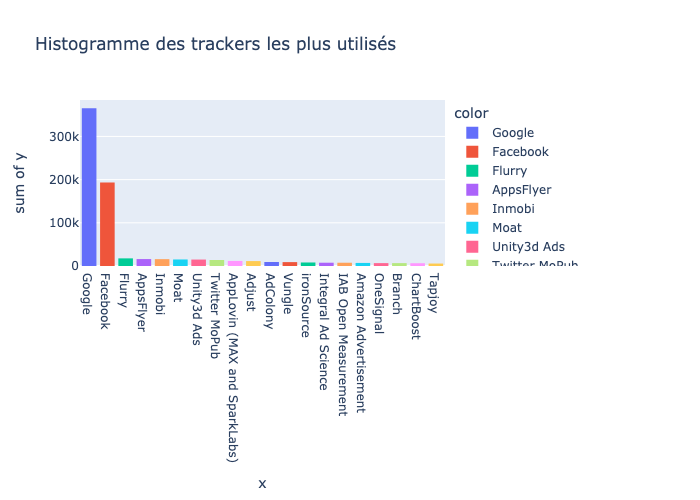

In [9]:
# get histo
#pip install -U kaleido
fig = px.histogram(x=list(NFirst_Result.keys()), y= list(NFirst_Result.values()), color=list(NFirst_Result.keys()), title="Histogramme des trackers les plus utilisés")
fig.show("png")

## Indice de Herfindahl Hirschmann

In [10]:
market_shares = []
total_market = sum(result.values()) # get total nb of trackers
for nb in result.values():
    mk = ((nb/total_market)*100)
    mk**=2
    market_shares.append(mk) # append all market shares in a list
IHH_index = sum(market_shares)

print("IHH index :", IHH_index)

IHH index : 1994.731223100649


IHH est proche de 2000, la concentration de marché est élevé.

In [11]:
# convert trackers occurrence dict into DataFrame
ord_result = pandas.DataFrame(ordered_result.items(), columns=['Name', 'Occurrence'])

In [12]:
# get creation date of each trackers

date = {}

for k,v in tuple_trackers:
    if k != "000":
        key = ast.literal_eval(data_trackers[k][0])
        date[key["name"]] = key["creation_date"]

trackers_date_dict = {}
for name in ord_result.loc[:, "Name"]:
    for k, v in date.items():
        if "Google" in k:
            trackers_date_dict["Google"] = "2017-09-24"
        elif "Facebook" in k:
            trackers_date_dict["Facebook"] = "2017-12-05"
        elif name in k:
            trackers_date_dict[k] = date[k]
trackers_date_df = pandas.DataFrame(trackers_date_dict.items(), columns=['Name', 'Date'])
print(trackers_date_df)

               Name        Date
0            Google  2017-09-24
1          Facebook  2017-12-05
2            Flurry  2017-09-24
3         AppsFlyer  2017-09-24
4            Inmobi  2018-03-04
..              ...         ...
376  IPQualityScore  2021-01-24
377         AdLocus  2021-02-28
378      Proximi.io  2021-03-12
379         Admitad  2021-02-28
380         Plexure  2021-05-16

[381 rows x 2 columns]


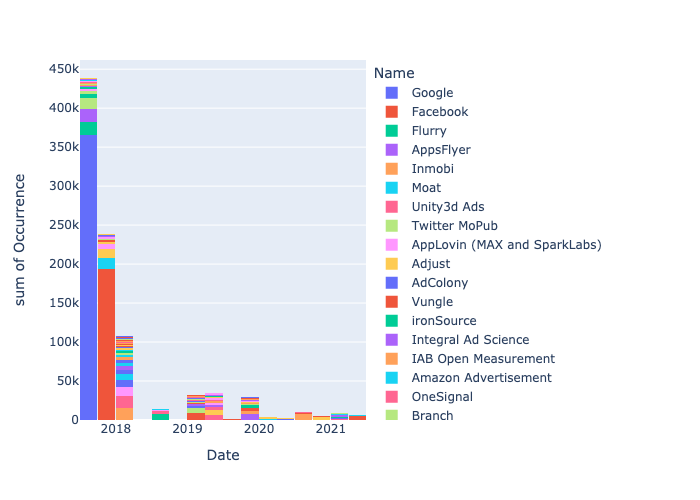

In [13]:

del ord_result["Name"]
frames = [trackers_date_df, ord_result]
concat_result = pandas.concat(frames, axis=1)

fig = px.histogram(concat_result, x=concat_result["Date"], y=concat_result["Occurrence"], color=concat_result["Name"])
fig.show("png")


# II - Quelles sont les catégories de trackers les plus représentées ?

In [15]:
# get pie chart of each categories market share

catResult = {}

for k, v in tuple_trackers:
    if k != "000":
        key = ast.literal_eval(data_trackers[k][0]) # convert str to dictionary
        for categories in key["categories"]: # loop in categories to count their occurrence

            if categories and categories in catResult.keys():
                catResult[categories] += 1
            else:
                catResult[categories] = 1

# nb of times each category of tracker is used
print(catResult)

{'Analytics': 182, 'Advertisement': 103, 'Crash reporting': 10, 'Identification': 20, 'Profiling': 47, 'Location': 56}


## Diagramme circulaire : répartition des catégories de trackers 

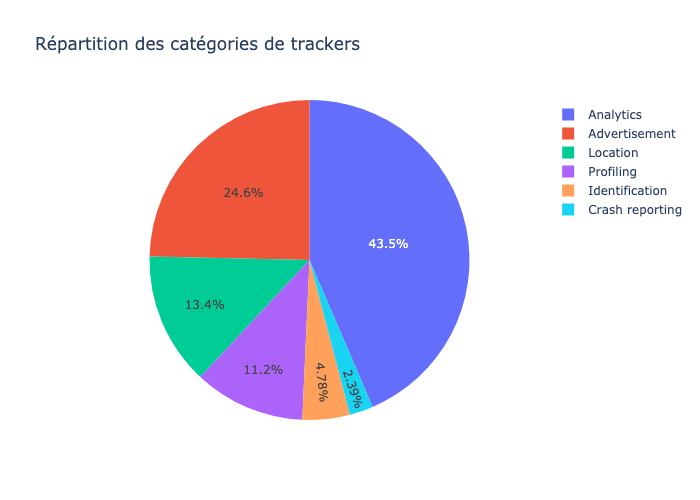

In [16]:
# get pie chart
fig = px.pie(values=list(catResult.values()), names=list(catResult.keys()), title="Répartition des catégories de trackers")
fig.show("png")